In [27]:
using Laplacians
using Plots
using LinearAlgebra
using SparseArrays

[ Info: Saved animation to /Users/sushant/Library/CloudStorage/Dropbox/Projects/2023/simons-bootcamp/anim_fps15.gif


Plots.AnimatedGif("/Users/sushant/Library/CloudStorage/Dropbox/Projects/2023/simons-bootcamp/anim_fps15.gif")
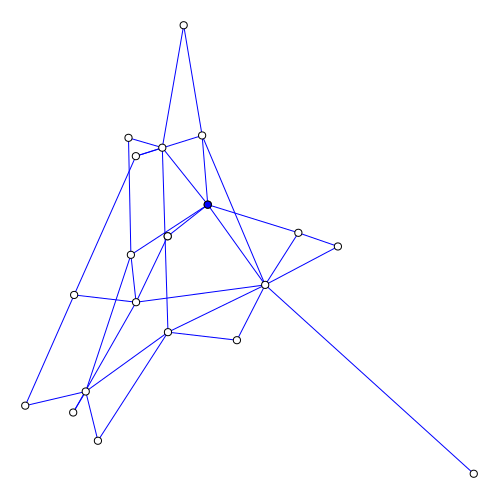

In [28]:
# Create a graph
A = Laplacians.uni_chimera(20, 6)
x,y = Laplacians.spectral_coords(A)

# # Run a random walk on this graph
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(500,500))

(ai,aj,av) = findnz(triu(A))
for i in 1:length(ai)
    s = [ai[i]; aj[i]]
    plot!(p, x[s], y[s], linecolor=:blue)
end
scatter!(p, x, y, color=:white, markerstrokecolor=false)

steps=20
vertices = A.n
# build an animated gif by pushing new points to the plot, saving every 10th frame
walk = ones(Int64, steps)
for i = 1:(steps-1)
    # Take a random step
    walk[i+1] = Laplacians.nbri(A, walk[i], rand(1:Laplacians.deg(A, walk[i])))
end

anim = @animate for i=2:steps
    # Erase old step
    scatter!(p, [x[walk[i-1]]], [y[walk[i-1]]], color=:white, markerstrokecolor=false)
    
    # Plot new step
    scatter!(p, [x[walk[i]]], [y[walk[i]]], color=:blue, markerstrokecolor=false)
end
gif(anim, "anim_fps15.gif", fps = 2)

In [29]:
# # Create a graph
# A = Laplacians.uni_chimera(20, 6)

# # Run a random walk on this graph
# p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(500,500))

# x, y = Laplacians.spectral_coords(A)
# # Plots.default(size = (800, 600))

# (ai,aj,av) = findnz(triu(A))
# for i in 1:length(ai)
#     s = [ai[i]; aj[i]]
#     plot!(p, x[s], y[s], linecolor=:blue)
# end
# scatter!(p, x, y, color=:white, markerstrokecolor=false)
# # Laplacians.plot_graph(A,x,y,color=:blue,dots=true)
# # scatter!(p,x, y, markercolor=:white, markerstrokecolor=false);

In [30]:
#| echo: true
A = Laplacians.path_graph(10)

10×10 SparseMatrixCSC{Float64, Int64} with 18 stored entries:
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 

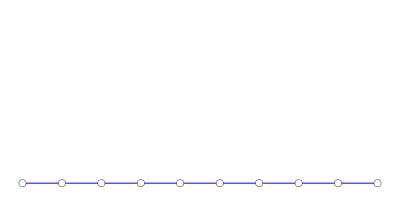

In [31]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,200))
plot!(p, 1:10, ones(10), linecolor=:blue,markerstrokecolor=false)
for i in 1:10
    scatter!(p, [i], [1], color=:white, markerstrokecolor=false)
end
p

In [32]:
#| echo: true
A = Laplacians.ring_graph(10)

10×10 SparseMatrixCSC{Float64, Int64} with 20 stored entries:
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0
 1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 

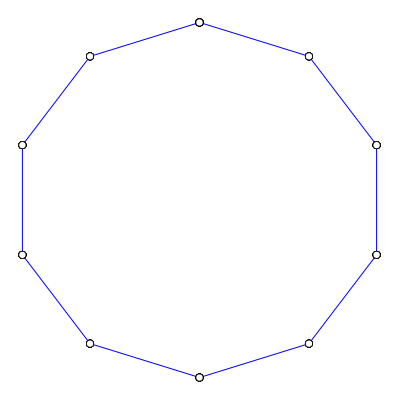

In [33]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
for i in 1:10
    scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
end
p

In [34]:
#| echo: true
#| code-overflow: wrap
A = sparse(collect(1:10), mod.(collect(1:10),10).+1, collect(1:10))
A = A + A'

10×10 SparseMatrixCSC{Int64, Int64} with 20 stored entries:
  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  10
  1  ⋅  2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
  ⋅  2  ⋅  3  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
  ⋅  ⋅  3  ⋅  4  ⋅  ⋅  ⋅  ⋅   ⋅
  ⋅  ⋅  ⋅  4  ⋅  5  ⋅  ⋅  ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  5  ⋅  6  ⋅  ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅  6  ⋅  7  ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  7  ⋅  8   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  8  ⋅   9
 10  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  9   ⋅

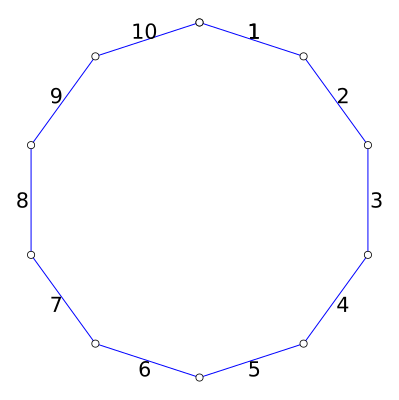

In [35]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.((collect(0:10))*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
scatter!(p, sin.((collect(0:10).+0.5)*2*π/10), cos.((collect(0:10).+0.5)*2*π/10), text=collect(1:10), color=:white, markerstrokecolor=false, ms=0)

In [36]:
#| echo: true
A = Laplacians.complete_graph(10)

10×10 SparseMatrixCSC{Float64, Int64} with 90 stored entries:
  ⋅   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0   ⋅   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0   ⋅   1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0   ⋅   1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0   ⋅   1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0   ⋅   1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0   ⋅   1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0   ⋅   1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   ⋅   1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   ⋅ 

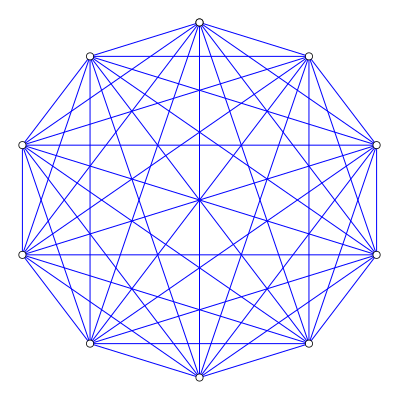

In [37]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))


x, y = sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10)
# Plots.default(size = (800, 600))

(ai,aj,av) = findnz(triu(A))
for i in 1:length(ai)
    s = [ai[i]; aj[i]]
    plot!(p, x[s], y[s], linecolor=:blue)
end
scatter!(p, x, y, color=:white, markerstrokecolor=false)

In [38]:
#| echo: true
A = Laplacians.ring_graph(10)
D = Laplacians.diagmat(A)

10×10 SparseMatrixCSC{Float64, Int64} with 10 stored entries:
 2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   2.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   2.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   2.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   2.0

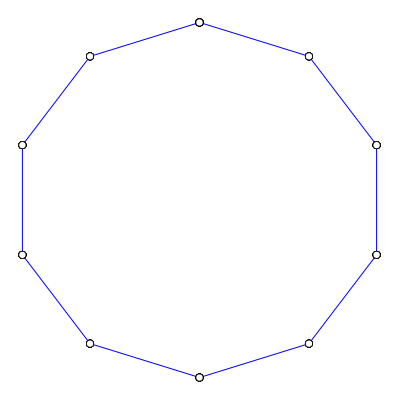

In [39]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
for i in 1:10
    scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
end
p

In [40]:
#| echo: true
#| code-overflow: wrap
A = sparse(collect(1:10), mod.(collect(1:10),10).+1, collect(1:10))
A = A + A'
D = Laplacians.diagmat(A)

10×10 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 11  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  3  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  ⋅  5  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  ⋅  ⋅  7  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  9   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅  11   ⋅   ⋅   ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅  13   ⋅   ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅  15   ⋅   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅  17   ⋅
  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  19

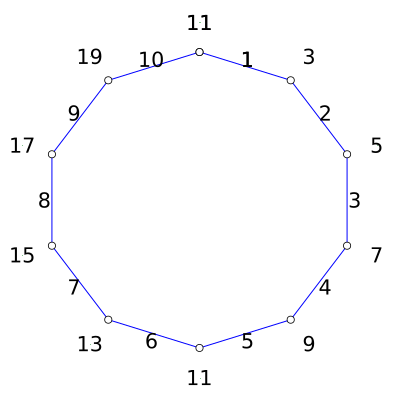

In [41]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.((collect(0:10))*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
scatter!(p, 1.2*sin.(collect(0:10)*2*π/10), 1.2*cos.(collect(0:10)*2*π/10), text=vec(sum(A,dims=1)), textcolor=:blue, markerstrokecolor=false, ms=0)
scatter!(p, sin.((collect(0:10).+0.5)*2*π/10), cos.((collect(0:10).+0.5)*2*π/10), text=collect(1:10), color=:white, markerstrokecolor=false, ms=0)

In [42]:
A = spzeros(10, 10)
A[3, 6] = 1
A = A + A'
Laplacians.lap(A)

10×10 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    1.0   ⋅    ⋅   -1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   -1.0   ⋅    ⋅    1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅     ⋅    ⋅    ⋅     ⋅    ⋅    ⋅    ⋅    ⋅ 

In [43]:
#| echo: true
A = Laplacians.ring_graph(10)
L = Laplacians.lap(A)

10×10 SparseMatrixCSC{Float64, Int64} with 30 stored entries:
  2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -1.0
 -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0
 -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0

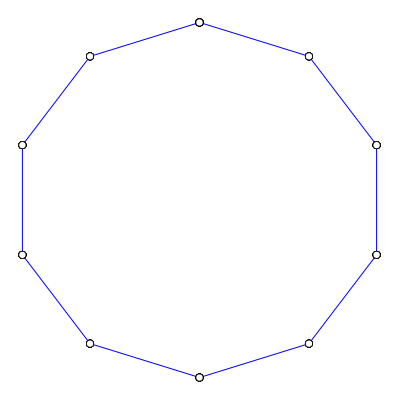

In [44]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
for i in 1:10
    scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
end
p

In [45]:
#| echo: true
#| code-overflow: wrap
A = sparse(collect(1:10), mod.(collect(1:10),10).+1, collect(1:10))
A = A + A'
L = Laplacians.lap(A)

10×10 SparseMatrixCSC{Float64, Int64} with 30 stored entries:
  11.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -10.0
  -1.0   3.0  -2.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅      ⋅ 
    ⋅   -2.0   5.0  -3.0    ⋅     ⋅     ⋅     ⋅     ⋅      ⋅ 
    ⋅     ⋅   -3.0   7.0  -4.0    ⋅     ⋅     ⋅     ⋅      ⋅ 
    ⋅     ⋅     ⋅   -4.0   9.0  -5.0    ⋅     ⋅     ⋅      ⋅ 
    ⋅     ⋅     ⋅     ⋅   -5.0  11.0  -6.0    ⋅     ⋅      ⋅ 
    ⋅     ⋅     ⋅     ⋅     ⋅   -6.0  13.0  -7.0    ⋅      ⋅ 
    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -7.0  15.0  -8.0     ⋅ 
    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -8.0  17.0   -9.0
 -10.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -9.0   19.0

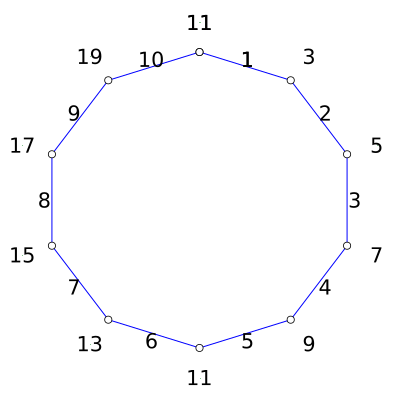

In [46]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))
plot!(p, sin.((collect(0:10))*2*π/10), cos.(collect(0:10)*2*π/10), linecolor=:blue,markerstrokecolor=false)
scatter!(p, sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10), color=:white, markerstrokecolor=false)
scatter!(p, 1.2*sin.(collect(0:10)*2*π/10), 1.2*cos.(collect(0:10)*2*π/10), text=vec(sum(A,dims=1)), textcolor=:blue, markerstrokecolor=false, ms=0)
scatter!(p, sin.((collect(0:10).+0.5)*2*π/10), cos.((collect(0:10).+0.5)*2*π/10), text=collect(1:10), color=:white, markerstrokecolor=false, ms=0)

In [47]:
#| echo: true
A = Laplacians.complete_graph(10)
L = Laplacians.lap(A)

10×10 SparseMatrixCSC{Float64, Int64} with 100 stored entries:
  9.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0   9.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0   9.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0   9.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0   9.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   9.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   9.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   9.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   9.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   9.0

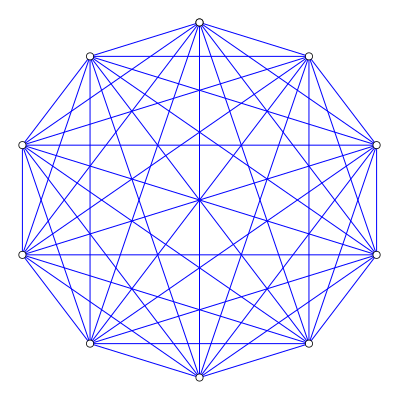

In [48]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))


x, y = sin.(collect(0:10)*2*π/10), cos.(collect(0:10)*2*π/10)
# Plots.default(size = (800, 600))

(ai,aj,av) = findnz(triu(A))
for i in 1:length(ai)
    s = [ai[i]; aj[i]]
    plot!(p, x[s], y[s], linecolor=:blue)
end
scatter!(p, x, y, color=:white, markerstrokecolor=false)

In [49]:
#| echo: true
A = Laplacians.complete_graph(4)
B = Laplacians.edgeVertexMat(A)

6×4 SparseMatrixCSC{Float64, Int64} with 12 stored entries:
 1.0  -1.0    ⋅     ⋅ 
 1.0    ⋅   -1.0    ⋅ 
  ⋅    1.0  -1.0    ⋅ 
 1.0    ⋅     ⋅   -1.0
  ⋅    1.0    ⋅   -1.0
  ⋅     ⋅    1.0  -1.0

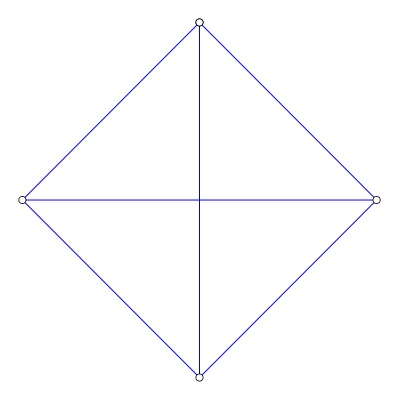

In [50]:
p = plot(;legend=false, axis=false, xticks=false, yticks=false, size=(400,400))


x, y = sin.(collect(0:4)*2*π/4), cos.(collect(0:4)*2*π/4)
# Plots.default(size = (800, 600))

(ai,aj,av) = findnz(triu(A))
for i in 1:length(ai)
    s = [ai[i]; aj[i]]
    plot!(p, x[s], y[s], linecolor=:blue)
end
scatter!(p, x, y, color=:white, markerstrokecolor=false)

[ Info: Saved animation to /Users/sushant/Library/CloudStorage/Dropbox/Projects/2023/simons-bootcamp/anim_fps15.gif


Plots.AnimatedGif("/Users/sushant/Library/CloudStorage/Dropbox/Projects/2023/simons-bootcamp/anim_fps15.gif")
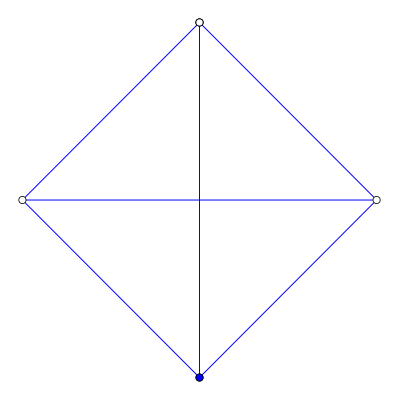

In [51]:

# (ai,aj,av) = findnz(triu(A))
# for i in 1:length(ai)
#     s = [ai[i]; aj[i]]
#     plot!(p, x[s], y[s], linecolor=:blue)
# end
# scatter!(p, x, y, color=:white, markerstrokecolor=false)

steps=20
vertices = A.n
# build an animated gif by pushing new points to the plot, saving every 10th frame
walk = ones(Int64, steps)
for i = 1:(steps-1)
    # Take a random step
    walk[i+1] = Laplacians.nbri(A, walk[i], rand(1:Laplacians.deg(A, walk[i])))
end

anim = @animate for i=2:steps
    # Erase old step
    scatter!(p, [x[walk[i-1]]], [y[walk[i-1]]], color=:white, markerstrokecolor=false)
    
    # Plot new step
    scatter!(p, [x[walk[i]]], [y[walk[i]]], color=:blue, markerstrokecolor=false)
end
gif(anim, "anim_fps15.gif", fps = 2)